In [1]:
#改变指定图像的亮度
def change_image_brightness(image, parameter):
    output_image = image.copy()
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            adjusted = (parameter + output_image[row, col])
            if adjusted > 255.0:
                adjusted = 255.0
            if adjusted < 0:
                adjusted = 0
            output_image[row, col] = np.uint8(adjusted)
    return output_image
# 全局灰度线性变换（也可对彩色图像进行线性变换）
def global_linear_transmation(im,c=0,d=255):
    img=im.copy()
    maxV = img.max()
    minV = img.min()
    if maxV==minV:
        return np.uint8(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i, j] = ((d-c) / (maxV - minV)) * (img[i, j] - minV)+c#img[i,j]代表的是某像素点三通道的值
    return np.uint8(img)
# 定义Gamma矫正的函数
def gamma_trans(img, gamma):
    # 具体做法是先归一化到1，然后gamma作为指数值求出新的像素值再还原
    gamma_table = [np.power(x / 255.0, gamma) * 255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    # 实现这个映射用的是OpenCV的查表函数
    return cv2.LUT(img, gamma_table)


In [2]:
#水平梯度浮雕效果
def emboss_h(gray,value):
    height,width=gray.shape[:2]
    dst = np.zeros((height,width),np.uint8)
    for i in range(0,height-1):
        for j in range(0,width):
            grayP0 = int(gray[i,j])
            grayP1 = int(gray[i+1,j])
            newP = grayP0-grayP1+value
            if newP > 255:
                newP = 255
            if newP < 0:
                newP = 0
            dst[i,j] = newP
    return dst
#垂直
def emboss_v(gray,value):
    height,width=gray.shape[:2]
    dst = np.zeros((height,width),np.uint8)
    for i in range(0,height):
        for j in range(0,width-1):
            grayP0 = int(gray[i,j])
            grayP1 = int(gray[i,j+1])
            newP = grayP0-grayP1+value
            if newP > 255:
                newP = 255
            if newP < 0:
                newP = 0
            dst[i,j] = newP
    return dst


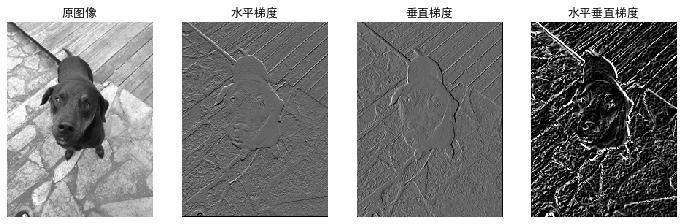

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

img=cv2.imread(r"..\img\kennysmall.jpg",0)

#水平垂直算子：
# fi1=np.array([-1,1])
# fi2=np.transpose([-1,1]) 
fi1=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
fi2=np.transpose(fi1) 

#使用opencv的卷积函数 滤波去噪声
img1 = cv2.filter2D(img,-1,fi1,borderType=cv2.BORDER_DEFAULT) 
img2 = cv2.filter2D(img,-1,fi2,borderType=cv2.BORDER_DEFAULT) 
imgAll=img1+img2#是将x和y拼凑成完整的一幅图片
img1=emboss_h(img,100)
img2=emboss_v(img,100)
# img1=change_image_brightness(img1,100)
# img2=change_image_brightness(img2,100)
imgAll=global_linear_transmation(imgAll)

#输出对应的图片
plt.figure(figsize=(12,6))
plt.subplot(141)
plt.imshow(img,vmin=0,vmax=255,cmap=plt.cm.gray)#设置内部的坐标，以及灰度的最大值和最小值
plt.title("原图像")
plt.axis('off')
plt.subplot(142)
plt.imshow(img1,vmin=0,vmax=255,cmap=plt.cm.gray)
plt.title("水平梯度")
plt.axis('off')
plt.subplot(143)
plt.imshow(img2,vmin=0,vmax=255,cmap=plt.cm.gray)
plt.title("垂直梯度")
plt.axis('off')
plt.subplot(144)
plt.imshow(imgAll,vmin=0,vmax=255,cmap=plt.cm.gray)
plt.title("水平垂直梯度")
plt.axis('off')
# plt.savefig("ch3-40.jpg")
plt.show()